<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_customerpersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster

In [1]:
!wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv"

--2022-05-01 07:46:55--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217947 (213K) [text/plain]
Saving to: ‘marketing_campaign.csv’

marketing_campaign. 100%[===================>] 212.84K  --.-KB/s    in 0.004s  

2022-05-01 07:46:55 (47.7 MB/s) - ‘marketing_campaign.csv’ saved [217947/217947]



**Load CSV Dataset**

In [3]:

dataset = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
# dataset = pd.read_csv("marketing_campaign.csv",delimiter='\t')

In [4]:
df = pd.DataFrame(dataset)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# df.isnull().sum()
# df.info()
df.columns
# df.index
# df.values
# df.shape
# df.head()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Function to convert Year_Birth column to Age

def age(birthyear):
  today = date.today()
  age = today.year - birthyear
  return age

In [7]:
# Add new column 'Age' to dataset
df['Age'] = age(df['Year_Birth'])

# Add new column Kids = Kidhome + Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Add new column AmountSpent = Add ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
df['AmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Add new column NoOfPurchases = Add ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')
df['NoOfPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,AmountSpent,NoOfPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,65,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,68,2,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,57,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,38,1,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,41,1,422,14


In [8]:
# Drop unwanted columns
df.drop(['Year_Birth','ID','Z_CostContact','Z_Revenue','Kidhome','Teenhome',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
        axis=1,inplace=True)
# df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
#         axis=1,inplace=True)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,0,68,2,27,4
2,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,0,57,0,776,20
3,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,0,38,1,53,6
4,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,0,41,1,422,14


In [9]:
df['Marital_Status'].unique()
df['Education'].unique()

df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Divorced':'Couple',
                                                    'Alone':'Single','Widow':'Single','Alone':'Single',
                                                    'Absurd':'Single','YOLO':'Single'})

df['Education'] = df['Education'].replace({'Basic':'Basic','2n Cycle':'Basic', 
                                           'Master':'Graduation','PhD':'Doctorate'})

df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,0,68,2,27,4
2,Graduation,Couple,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,0,57,0,776,20
3,Graduation,Couple,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,0,38,1,53,6
4,Doctorate,Couple,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,0,41,1,422,14


In [10]:


label_encoder = LabelEncoder()
df['Education'] = df[['Education']].apply(label_encoder.fit_transform)

one_hot_encoder = OneHotEncoder()
df1 = one_hot_encoder.fit_transform(df[['Marital_Status']]).toarray()

encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(), data = df1)
encodings = encodings.astype(int)
df = pd.concat([df,encodings] , axis=1)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single
0,2,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,1,65,0,1617,22,0,1
1,2,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,68,2,27,4,0,1
2,2,Couple,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,57,0,776,20,1,0
3,2,Couple,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,38,1,53,6,1,0
4,1,Couple,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,41,1,422,14,1,0


In [11]:
df = df.drop(['Marital_Status'],axis=1)

df.head()

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single
0,2,58138.0,04-09-2012,58,635,88,546,172,88,88,...,0,0,0,1,65,0,1617,22,0,1
1,2,46344.0,08-03-2014,38,11,1,6,2,1,6,...,0,0,0,0,68,2,27,4,0,1
2,2,71613.0,21-08-2013,26,426,49,127,111,21,42,...,0,0,0,0,57,0,776,20,1,0
3,2,26646.0,10-02-2014,26,11,4,20,10,3,5,...,0,0,0,0,38,1,53,6,1,0
4,1,58293.0,19-01-2014,94,173,43,118,46,27,15,...,0,0,0,0,41,1,422,14,1,0


In [12]:
today = date.today()
x = pd.to_datetime(today) - pd.to_datetime(df['Dt_Customer'])
df['Customer_Since'] = x.dt.days

df['AcceptedCmp_total'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [13]:
# Drop Dt_Customer
df.drop(['Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], axis=1,inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2240 non-null   int64  
 1   Income                 2216 non-null   float64
 2   Recency                2240 non-null   int64  
 3   MntWines               2240 non-null   int64  
 4   MntFruits              2240 non-null   int64  
 5   MntMeatProducts        2240 non-null   int64  
 6   MntFishProducts        2240 non-null   int64  
 7   MntSweetProducts       2240 non-null   int64  
 8   MntGoldProds           2240 non-null   int64  
 9   NumDealsPurchases      2240 non-null   int64  
 10  NumWebVisitsMonth      2240 non-null   int64  
 11  Complain               2240 non-null   int64  
 12  Response               2240 non-null   int64  
 13  Age                    2240 non-null   int64  
 14  Kids                   2240 non-null   int64  
 15  Amou

In [14]:
# df[df.Income.isnull()]


impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df['Income'] = impute.fit_transform(df['Income'].to_numpy().reshape(-1,1))

df[df.Income.isnull()]
# df['Income']
# df['Income'].to_numpy().reshape(-1,1)
# impute.fit_transform(df['Income'].to_numpy().reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2240 non-null   int64  
 1   Income                 2240 non-null   float64
 2   Recency                2240 non-null   int64  
 3   MntWines               2240 non-null   int64  
 4   MntFruits              2240 non-null   int64  
 5   MntMeatProducts        2240 non-null   int64  
 6   MntFishProducts        2240 non-null   int64  
 7   MntSweetProducts       2240 non-null   int64  
 8   MntGoldProds           2240 non-null   int64  
 9   NumDealsPurchases      2240 non-null   int64  
 10  NumWebVisitsMonth      2240 non-null   int64  
 11  Complain               2240 non-null   int64  
 12  Response               2240 non-null   int64  
 13  Age                    2240 non-null   int64  
 14  Kids                   2240 non-null   int64  
 15  Amou

In [15]:

# Calculate duplicates
# dups = df.duplicated()

# Print if there are any duplicates
# print(dups.any()," No of duplicates: ",len(df[dups]), df.shape)
# print(df.values[df.index==2236])

# Drop duplicate rows
# df.drop_duplicates(inplace = True)
# print(pd.DataFrame(df[df.duplicated(keep=False)]))
# df.shape

In [16]:
# d = pd.DataFrame({
#     'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
#     'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
#     'rating': [4, 4, 3.5, 15, 5]
# })
# d.duplicated()
# d.drop_duplicates(inplace=True)
# d

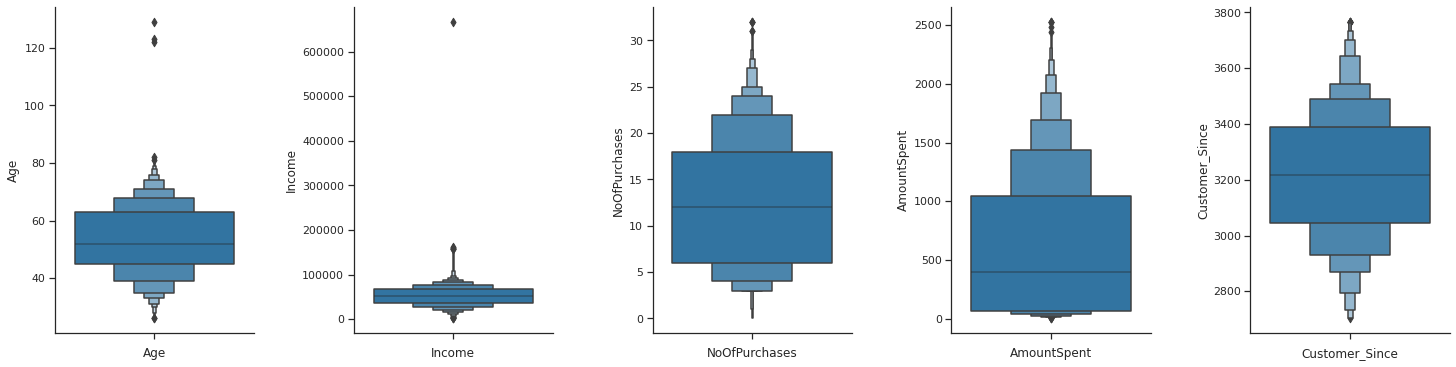

In [17]:

sns.set_theme(style="ticks", palette="tab10")

cols = ['Age','Income','NoOfPurchases','AmountSpent','Customer_Since']

fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

fig.subplots_adjust(wspace=0.5)
sns.despine()


In [18]:
# print("Number of customers above the age of 100= ", len(df[df["Age"]>100]))
# print("Number of customers with income above 200,000= ", len(df[df["Income"]>200000]))

#Remove outliers. Grab the indexes of the outliers 
index_names = df[ (df['Age'] > 100) | (df['Income'] > 200_000)].index
# drop these given row indexes from dataFrame
df.drop(index_names, inplace = True)

df.reset_index(drop= True, inplace=True)
# df.info()

In [19]:
# Take copy of data to a new dataframe df_orig

df_orig = df.copy(deep=True)
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2236 non-null   int64  
 1   Income                 2236 non-null   float64
 2   Recency                2236 non-null   int64  
 3   MntWines               2236 non-null   int64  
 4   MntFruits              2236 non-null   int64  
 5   MntMeatProducts        2236 non-null   int64  
 6   MntFishProducts        2236 non-null   int64  
 7   MntSweetProducts       2236 non-null   int64  
 8   MntGoldProds           2236 non-null   int64  
 9   NumDealsPurchases      2236 non-null   int64  
 10  NumWebVisitsMonth      2236 non-null   int64  
 11  Complain               2236 non-null   int64  
 12  Response               2236 non-null   int64  
 13  Age                    2236 non-null   int64  
 14  Kids                   2236 non-null   int64  
 15  Amou

In [20]:
# Feature Scaling


scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total
0,0.645620,0.288513,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,...,-0.095001,2.386338,1.016868,-1.264308,1.680176,1.312080,-1.723827,1.723827,1.975467,-0.438933
1,0.645620,-0.262438,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,...,-0.095001,-0.419052,1.273264,1.395139,-0.962202,-1.186198,-1.723827,1.723827,-1.667017,-0.438933
2,0.645620,0.917992,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,...,-0.095001,-0.419052,0.333146,-1.264308,0.282541,1.034493,0.580104,-0.580104,-0.172996,-0.438933
3,0.645620,-1.182621,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,...,-0.095001,-0.419052,-1.290693,0.065416,-0.918994,-0.908611,0.580104,-0.580104,-1.925349,-0.438933
4,-0.805241,0.295754,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,...,-0.095001,-0.419052,-1.034298,0.065416,-0.305762,0.201734,0.580104,-0.580104,-0.823131,-0.438933


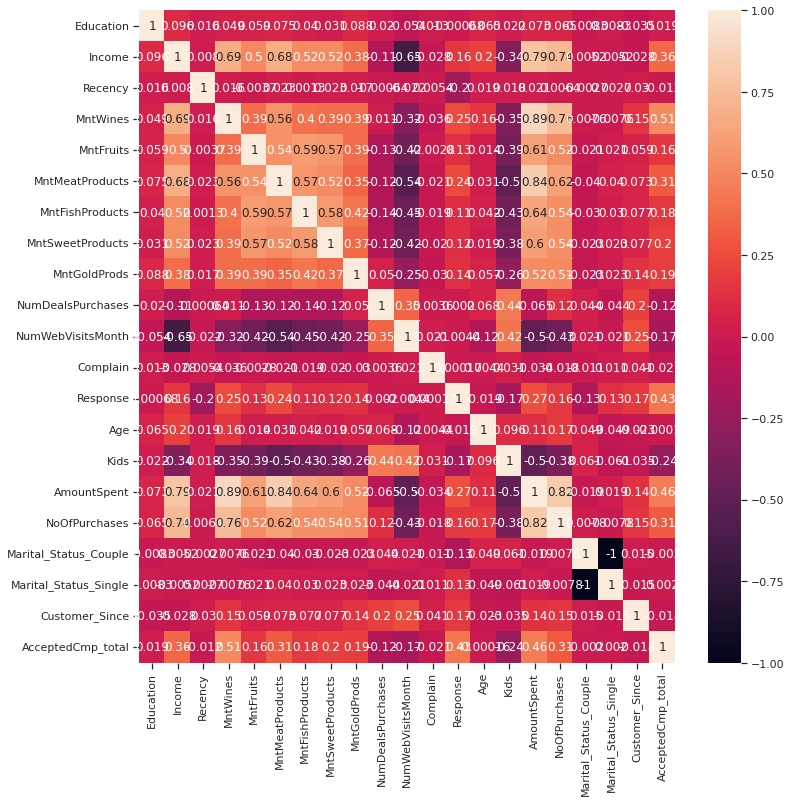

In [21]:
fig = plt.figure(figsize=(12,12))         
sns.heatmap(df.corr(), annot = True)

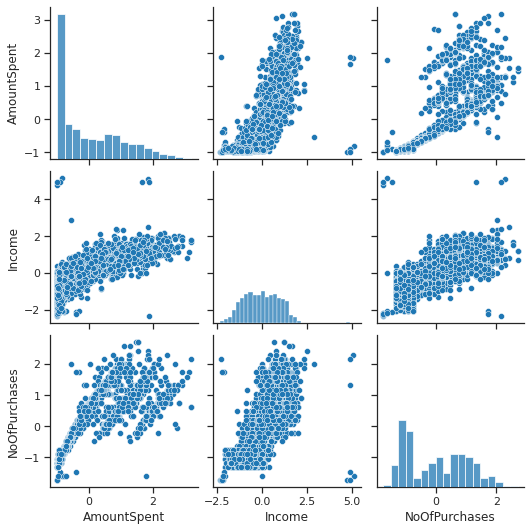

In [22]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# There are some correlataions such as Income vs Amount Spent and No of Purchases. They can be viewed again in a pairplot. 
# Hence, there is scope for Dimentionaly Reduction.

sns.pairplot(df[['AmountSpent','Income','NoOfPurchases']])

In [23]:
# Function to select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # absolute coeff value to account for -ve correlation
                colname = corr_matrix.columns[i]  # get name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.75)
print(len(set(corr_features)), " ", corr_features)

3   {'Marital_Status_Single', 'AmountSpent', 'NoOfPurchases'}


In [24]:
# Drop correlated features from dataset
df = df.drop(corr_features,axis=1)
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,Marital_Status_Couple,Customer_Since,AcceptedCmp_total
0,0.645620,0.288513,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,0.692865,-0.095001,2.386338,1.016868,-1.264308,-1.723827,1.975467,-0.438933
1,0.645620,-0.262438,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-0.131421,-0.095001,-0.419052,1.273264,1.395139,-1.723827,-1.667017,-0.438933
2,0.645620,0.917992,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,-0.543564,-0.095001,-0.419052,0.333146,-1.264308,0.580104,-0.172996,-0.438933
3,0.645620,-1.182621,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,0.280722,-0.095001,-0.419052,-1.290693,0.065416,0.580104,-1.925349,-0.438933
4,-0.805241,0.295754,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,-0.131421,-0.095001,-0.419052,-1.034298,0.065416,0.580104,-0.823131,-0.438933


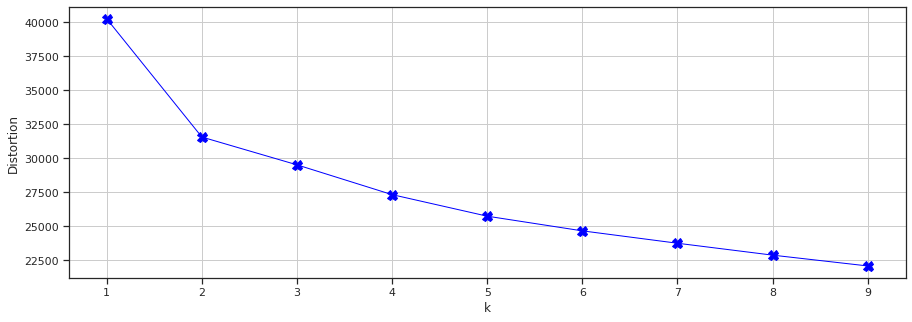

In [25]:


distortions = []
K = range(1,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df)
    distortions.append(km.inertia_)

plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bX-',linewidth=1, markersize=10)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [26]:
kmeans = cluster.KMeans(n_clusters=4, init="k-means++",random_state=0)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [27]:
kmeans.cluster_centers_

kmeans.labels_

df['Cluster'] = kmeans.labels_
df_orig['Cluster'] = kmeans.labels_
df_orig.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total,Cluster
0,2,58138.0,58,635,88,546,172,88,88,3,...,1,65,0,1617,22,0,1,3674,0,1
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,68,2,27,4,0,1,2828,0,2
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,57,0,776,20,1,0,3175,0,1
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,38,1,53,6,1,0,2768,0,2
4,1,58293.0,94,173,43,118,46,27,15,5,...,0,41,1,422,14,1,0,3024,0,0


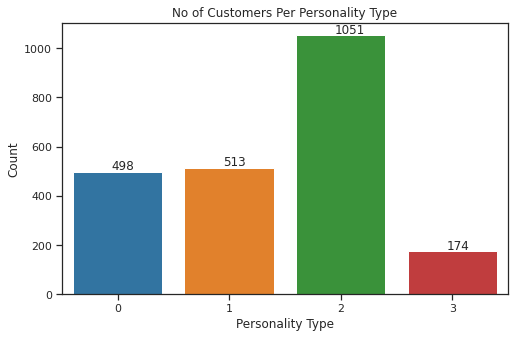

In [28]:
# plt.rcParams.update()
# plt.hist(df_orig['Cluster'],align='mid',bins=df_orig['Cluster'].unique().sort())

plt.rcParams.update({'axes.grid': False})
plt.figure(figsize =(8, 5))
count_plot = sns.countplot(x = 'Cluster', 
                           data = df_orig)
count_plot.set(xlabel ="Personality Type", 
               ylabel = "Count", 
               title ='No of Customers Per Personality Type')

total = len(df_orig)

for p in count_plot.patches:
   count_plot.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))
  #  percentage = ' ({:.1f}%)'.format(100 * p.get_height()/total)
  #  x = p.get_x() + p.get_width()
  #  y = p.get_height() + 20
  #  count_plot.annotate(percentage, (x, y),va = 'center')

# sns.despine()

<Figure size 720x720 with 0 Axes>

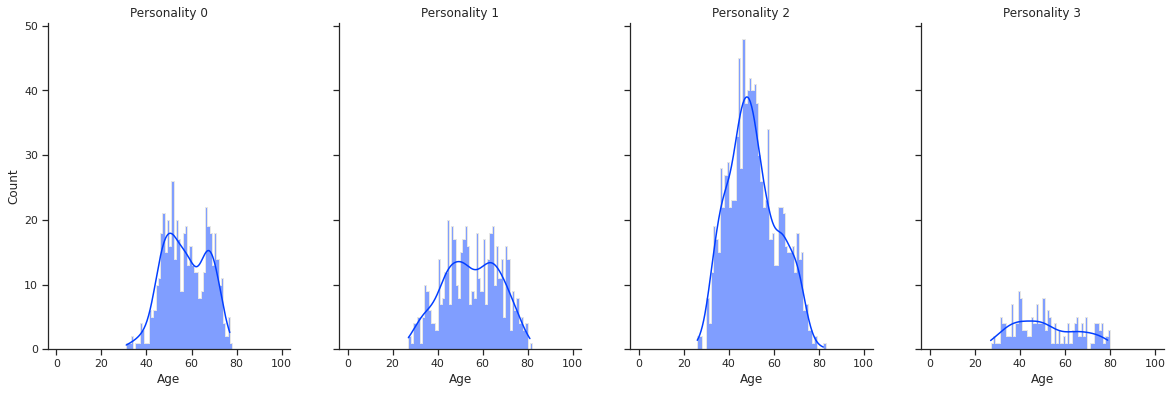

In [29]:
# plot Age for each Personality type

plt.figure(figsize=(10,10))
k=4
fig, ax = plt.subplots(ncols=k, figsize=(5 * k,6), sharex = True, sharey = True)

for i in range(k):
  ax[i].set_title("Personality "+str(i))
  sns.histplot(
      df_orig[df_orig["Cluster"]==i],
      x="Age",
      hue="Cluster",
      multiple="stack",
      palette="bright",
      edgecolor=".9",
      bins= list(range(1,100)),
      ax=ax[i],
      legend=False,
      kde=True,
      element = "step"
  )
sns.despine()


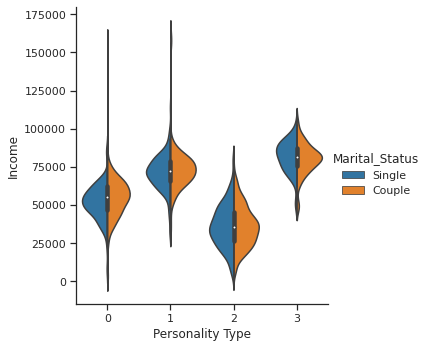

In [30]:
# Single = df_orig.copy()

# Single['count'] = df_orig.groupby('Cluster')['Cluster'].transform('count')
# Single['Single'] = df_orig.groupby('Cluster')['Marital_Status_Single'].transform('sum')
# Single['Couple'] = df_orig.groupby('Cluster')['Marital_Status_Couple'].transform('sum')
# Single.head()

# some = Single[["Cluster","count","Single","Couple"]].drop_duplicates().sort_values('Cluster').reset_index(drop=True)

# some.head(1)


df_orig['Marital_Status'] = np.where(df_orig['Marital_Status_Single']==1,'Single','Couple')
df_orig.head()

# plt.figure(figsize=(14,10))
# fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))

g = sns.catplot(x="Cluster", y="Income", hue="Marital_Status",
            kind="violin", split=True, data=df_orig)
g.set_xlabels("Personality Type")
g.set_titles("Income Distribution by Personality Type and Marital Status")
sns.despine()

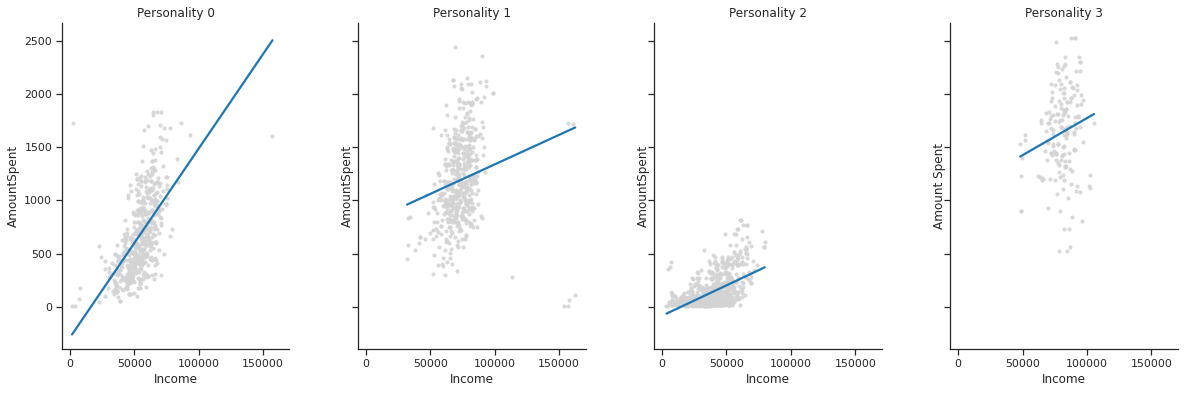

In [31]:
fig, axs = plt.subplots(1, k, figsize=(5 * k,6),sharex=True,sharey=True)

for i in range(k):
  g = sns.regplot(data = df_orig[df_orig['Cluster']==i],
              x = 'Income', ci = None,
              y = 'AmountSpent', 
              scatter_kws = {'s':10, 'color':'lightgray'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="Amount Spent")
fig.subplots_adjust(wspace=0.3)
sns.despine()

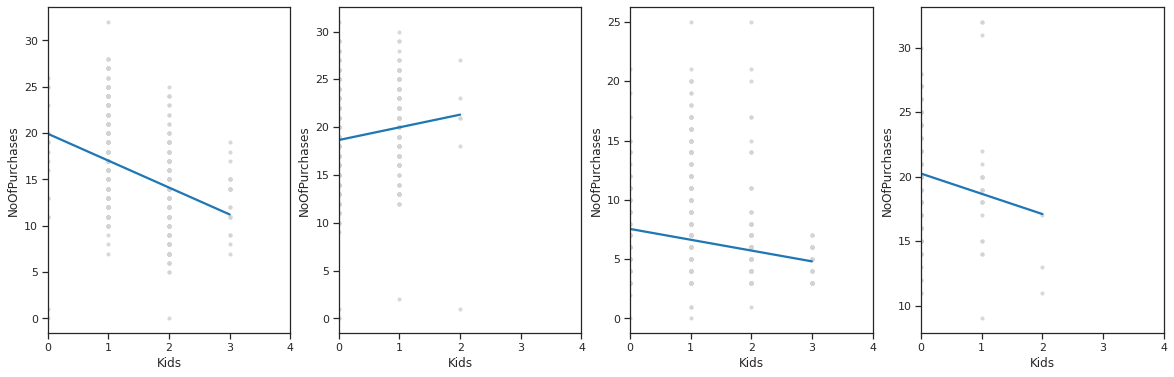

In [32]:
fig, axs = plt.subplots(1, k, figsize=(5 * k,6),sharex=True,sharey=False)

for i in range(k):
  g = sns.regplot(data = df_orig[df_orig['Cluster']==i],
              x = 'Kids', ci = None,
              y = 'NoOfPurchases', 
              scatter_kws = {'s':10, 'color':'lightgray'},
              ax = axs[i])
  axs[i].set_xlim(0, 4)

In [33]:
df_orig.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total,Cluster,Marital_Status
0,2,58138.0,58,635,88,546,172,88,88,3,...,65,0,1617,22,0,1,3674,0,1,Single
1,2,46344.0,38,11,1,6,2,1,6,2,...,68,2,27,4,0,1,2828,0,2,Single
2,2,71613.0,26,426,49,127,111,21,42,1,...,57,0,776,20,1,0,3175,0,1,Couple
3,2,26646.0,26,11,4,20,10,3,5,2,...,38,1,53,6,1,0,2768,0,2,Couple
4,1,58293.0,94,173,43,118,46,27,15,5,...,41,1,422,14,1,0,3024,0,0,Couple


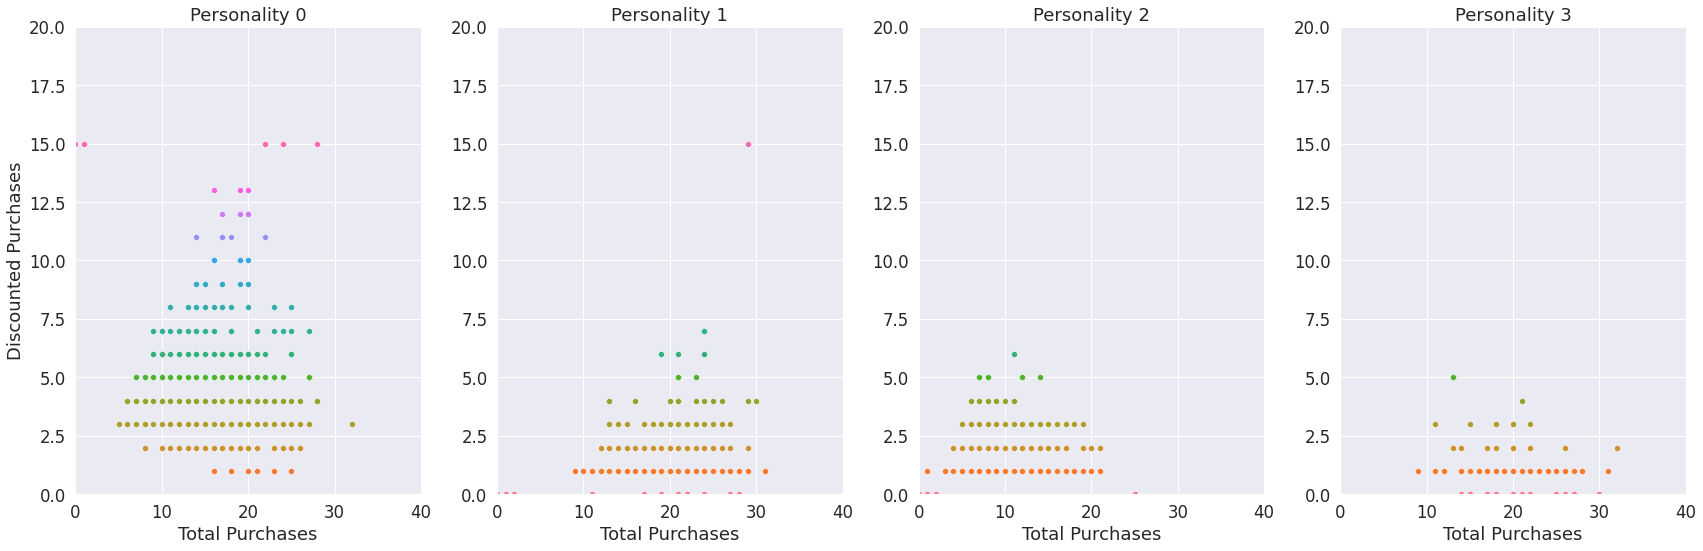

In [74]:
g = sns.FacetGrid(data = df_orig, col='Cluster', hue = 'NumDealsPurchases', sharey = False, ylim=(0,20), xlim=(0,40),aspect=.75, height=8)

g.map_dataframe(sns.scatterplot, y = 'NumDealsPurchases', x = 'NoOfPurchases')
g.set_axis_labels('Total Purchases','Discounted Purchases')
g.set_titles(col_template='Personality {col_name}')

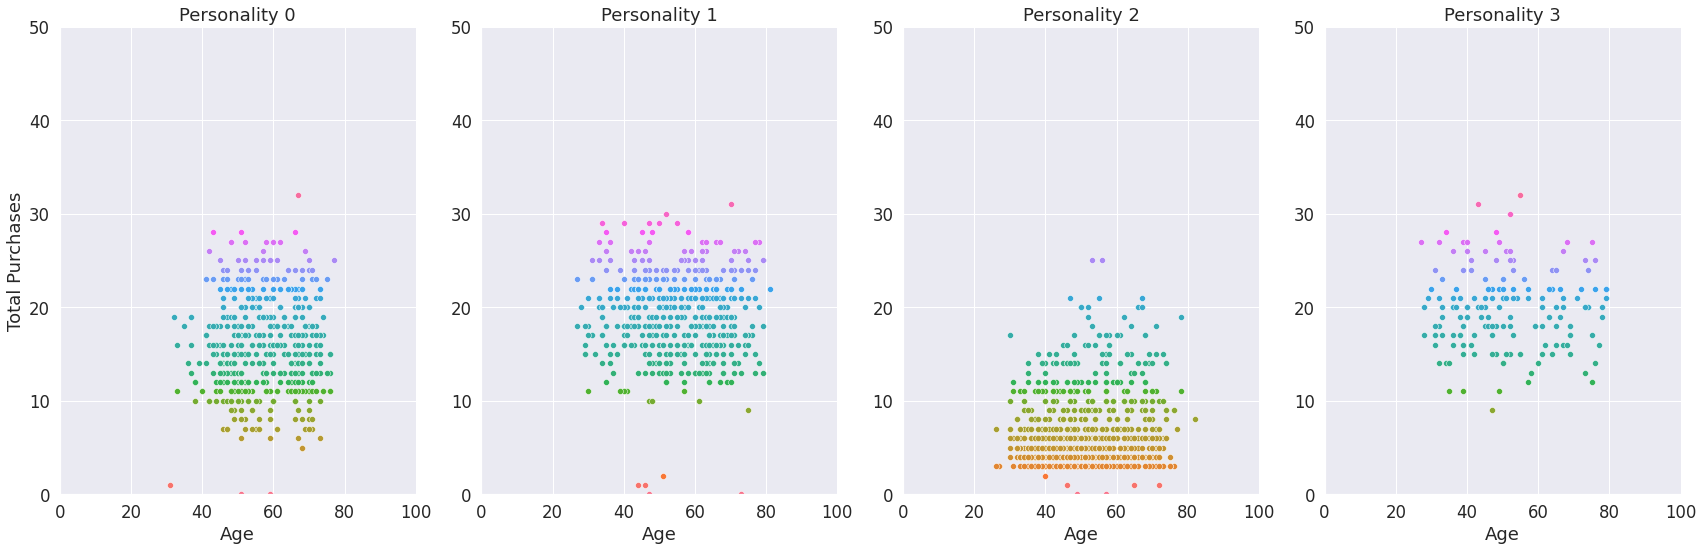

In [70]:
g = sns.FacetGrid(data = df_orig, col='Cluster', hue = 'NoOfPurchases', sharey = False, ylim=(0,50), 
                  xlim=(0,100),aspect=.75, height=8)

g.map_dataframe(sns.scatterplot, y = 'NoOfPurchases', x = 'Age')
g.set_axis_labels('Age','Total Purchases')
g.set_titles(col_template='Personality {col_name}')

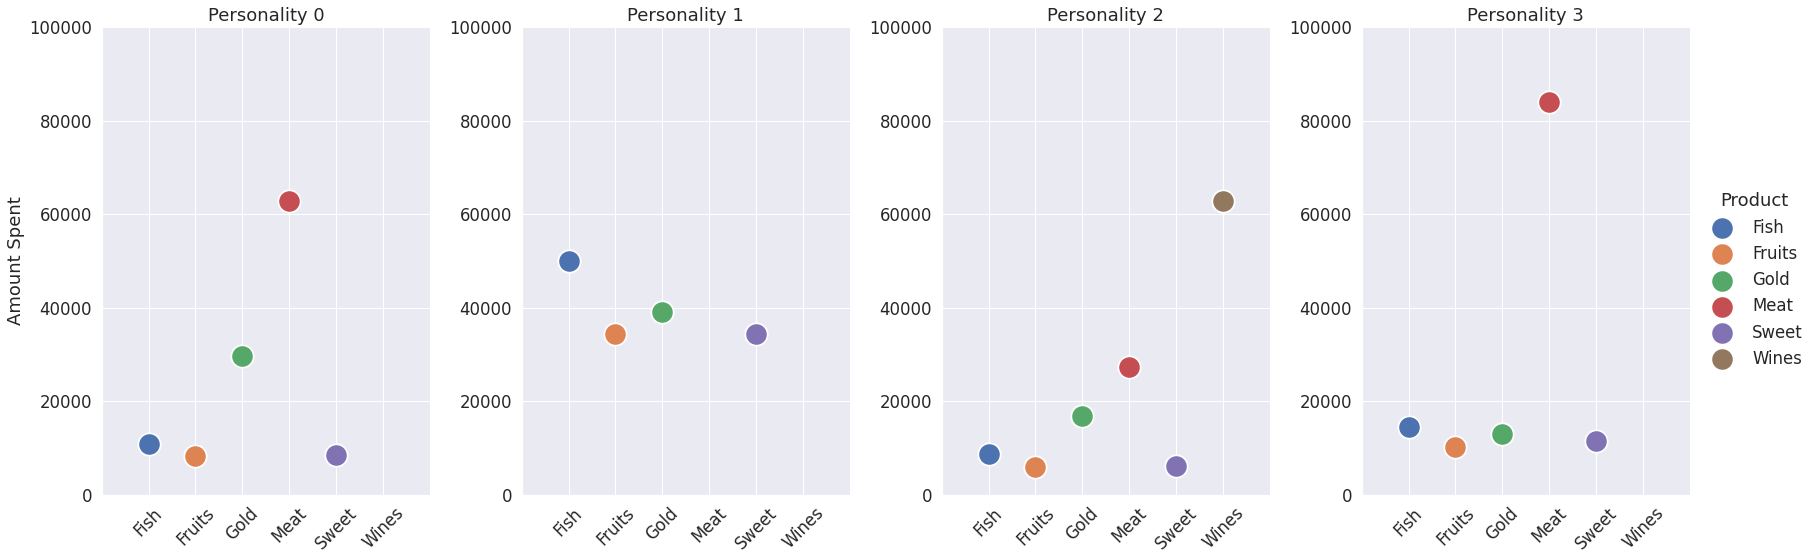

In [133]:
df_long = df_orig[['Cluster','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
# df_long

df_long_melt = pd.melt(df_long, id_vars=['Cluster'], var_name = 'Product', value_name='AmountSpent')

df_long_melt

# # df_long_melt.loc[df_long_melt['Cluster']==0].groupby(['Cluster','Product'], as_index=False).sum()


# new = pd.DataFrame(df_long_melt.groupby(['Cluster','Product'], as_index=False).agg(
#     AmountSpentSum=("AmountSpent", "sum"),
#     NoOfPurchasesSum=("NoOfPurchases", "sum")))
# new


new = pd.DataFrame(df_long_melt.groupby(['Cluster','Product'], as_index=False)['AmountSpent'].agg('sum')) #
new
new['Product'] = new['Product'].str.replace('Mnt','')
new['Product'] = new['Product'].str.replace('Products','')
new['Product'] = new['Product'].str.replace('Prods','')

sns.set(font_scale=1.5)

g = sns.FacetGrid(data = new, col='Cluster', hue = 'Product', sharey = False, sharex=False,ylim=(0,100000), xlim=(-1,6),
                  aspect=.75, height=8)

g.map_dataframe(sns.scatterplot, y = 'AmountSpent', x ='Product' ,size='AmountSpent',sizes=(500,85000))
g.set_axis_labels('','Amount Spent')
g.set_titles(col_template='Personality {col_name}')
g.set_xticklabels(rotation=45) 
g.add_legend()